In [1]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
print ("setup complete")

setup complete


**Setting up Dataset**

In [3]:
my_data = pd.read_csv('/Users/sahilchakraborty/Desktop/Data_analysis/Analysis/Churn_Modelling.csv')
my_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


**Cleaning the Data**

In [18]:
my_data['Age']= my_data['Age'].replace('Nan', np.nan).astype(float)
my_data['Age'] = my_data['Age'].replace( np.nan,my_data.Age.mean())

my_data.CreditScore = my_data.CreditScore.replace('Nan', np.nan).astype(int)
my_data.Balance = my_data.Balance.replace('Nan', 0.00).astype(float)
my_data.EstimatedSalary = my_data.EstimatedSalary.replace('Nan', 0.00).astype(float)
my_data.Tenure = my_data.Tenure.replace('Nan', 0).astype(int)
my_data['Geography']= my_data['Geography'].replace('nan', my_data.Geography.mode()[0])
my_data['NumOfProducts'] = my_data['NumOfProducts'].replace('Nan',np.nan).astype(int)
my_data['NumOfProducts'] = my_data['NumOfProducts'].replace(np.nan,0).astype(int)

my_data['HasCrCard'] = my_data['HasCrCard'].replace('Nan', np.nan).astype(float)
my_data['HasCrCard'] = my_data['HasCrCard'].replace(np.nan, 0.0).astype(float)

my_data['IsActiveMember'] = my_data['IsActiveMember'].replace('Nan', np.nan).astype(float)
my_data['IsActiveMember'] = my_data['IsActiveMember'].replace(np.nan,0.0).astype(float)
my_data.EstimatedSalary = my_data.EstimatedSalary.replace('Nan', np.nan).astype(float)
my_data.EstimatedSalary = my_data.EstimatedSalary.replace(np.nan,0.0).astype(float)



**Cleaned Dataset**

In [19]:
my_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.000000,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.000000,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.000000,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.000000,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.000000,2,125510.82,1,0.0,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.000000,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.000000,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.000000,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.000000,4,142051.07,2,0.0,0.0,74940.50,0
9,10,15592389,H?,684,France,Male,38.922311,2,134603.88,1,1.0,1.0,71725.73,0


In [20]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10002 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10002 non-null  float64
 11  IsActiveMember   10002 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


**Customers having Zero balance Accounts  despite having salary**

In [21]:
# Customers having Zero balance Accounts despite having salary

zero_balance_with_salary = my_data[(my_data['Balance'] == 0.00) & (my_data['EstimatedSalary'] > 0)]
print("Rows with Balance = 0.00 but non-zero EstimatedSalary:", zero_balance_with_salary.shape[0])

# Churned users with 0.00 balance and salary > 0

churned_from_zero_balance = my_data[(my_data['Balance'] == 0.00) & (my_data['EstimatedSalary'] > 0) & (my_data['Exited'] == 1)]
print("Churned users with 0.00 balance and salary > 0:", churned_from_zero_balance.shape[0])

# Percentage of churned users with 0.00 balance and salary > 0

churn_rate = churned_from_zero_balance.shape[0] / 3617 * 100
print(f"Churn rate for zero-balance-but-has-salary group: {churn_rate:.2f}%")

# Overall churn rate

overall_churn_rate = my_data['Exited'].sum() / my_data.shape[0] * 100
print(f"Overall churn rate: {overall_churn_rate:.2f}%")




Rows with Balance = 0.00 but non-zero EstimatedSalary: 3617
Churned users with 0.00 balance and salary > 0: 500
Churn rate for zero-balance-but-has-salary group: 13.82%
Overall churn rate: 20.38%


**PLOT 1 : This shows the churning between NonZero Balance(Salaried) vs ZeroBalance(Salaried) customares**

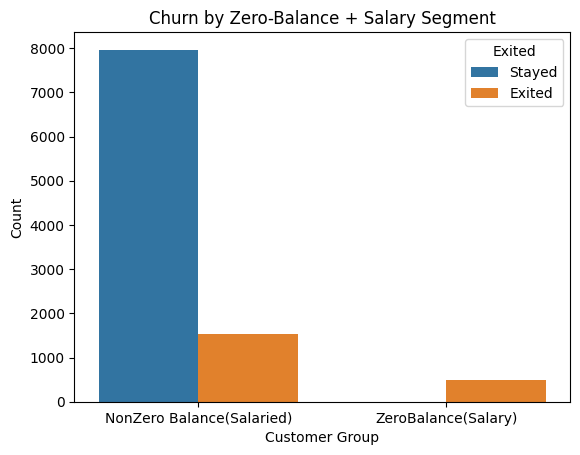

In [23]:
my_data['ZeroBalanceButHasSalary'] = ((my_data['Balance'] == 0.0) & (my_data['EstimatedSalary'] > 0) &(my_data['Exited'] == 1)).astype(int)



sns.countplot(x='ZeroBalanceButHasSalary', hue='Exited', data=my_data)
plt.title("Churn by Zero-Balance + Salary Segment")
plt.xticks([0,1], ['NonZero Balance(Salaried)', 'ZeroBalance(Salary)'])
plt.xlabel("Customer Group")
plt.ylabel("Count")
plt.legend(title='Exited', labels=['Stayed', 'Exited'])
plt.show()

**PLOT 2 : Overall churn rate Vs Zero Balance + Salary Churn Rate**

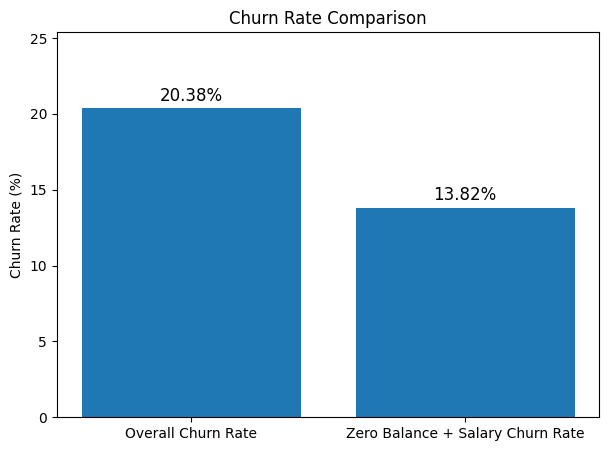

In [24]:
churn_rates = [20.38, 13.82]
labels = ['Overall Churn Rate', 'Zero Balance + Salary Churn Rate']

# Plot
plt.figure(figsize=(7,5))
plt.bar(labels, churn_rates)
plt.title("Churn Rate Comparison")
plt.ylabel("Churn Rate (%)")
plt.ylim(0, max(churn_rates) + 5)

# Add value labels
for i, rate in enumerate(churn_rates):
    plt.text(i, rate + 0.5, f"{rate:.2f}%", ha='center', fontsize=12)

plt.show()

**PLOT 3 : Toatal of 500 coustomers Churned out of 3617**

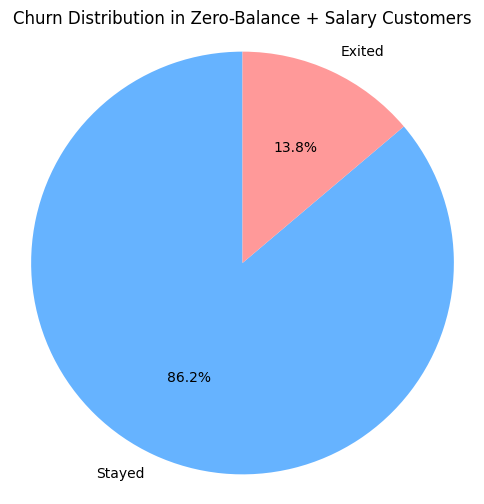

In [25]:
labels = ['Stayed', 'Exited']
sizes = [3617 - 500, 500]

colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Churn Distribution in Zero-Balance + Salary Customers")
plt.axis('equal')
plt.show()

**Analysis 1:**
1. Customers with 0 Balance but Non-Zero Estimated Salary:
**3617** customers (≈36% of total) have a balance of ₹0.00 but an Estimated Salary > 0.

Among these, only **500** customers exited, leading to a churn rate of **13.82%**, which is significantly lower than the overall churn rate of **20.38%**.

This segment is less likely to churn — indicating that zero balance doesn’t always mean disengagement.These might be salary account holders or strategic users who withdraw their balance but still retain the account.

**Analysing wheather Age has corelation with churn**                                                                                              

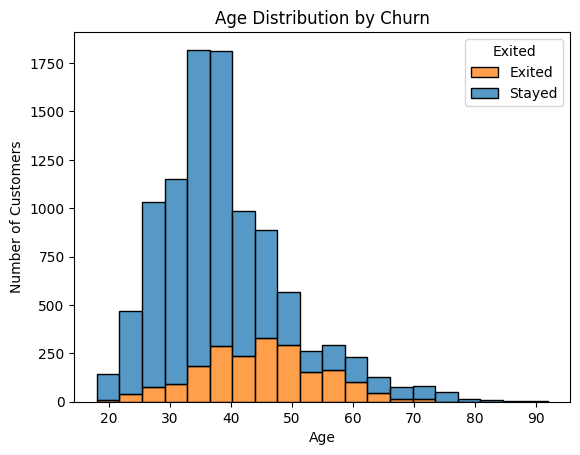

In [26]:
sns.histplot(data=my_data, x='Age', hue='Exited', multiple='stack', bins=20)
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Exited', 'Stayed'])
plt.show()


**Analysis 2: Churn by Age Group (from earlier)**

1. Churn increases with age — older customers churn more.

2. Customers above 50 are especially prone to leaving.

* Conclusion: Provide better retirement-oriented products, financial advisory, and personalized care to older demographics.

**Analysing wheather customers having more Products has corelation with churn**

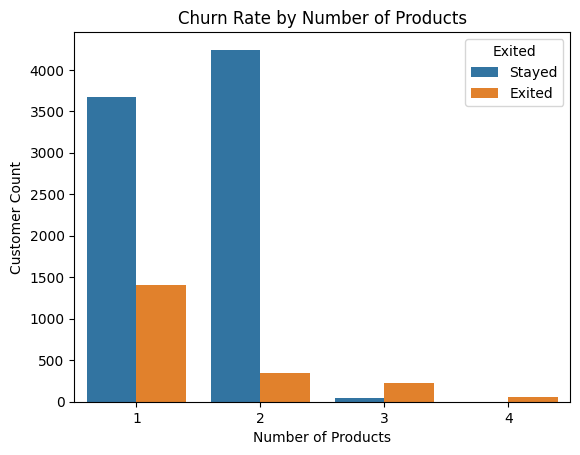

In [27]:
sns.countplot(data=my_data, x='NumOfProducts', hue='Exited')
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")

plt.ylabel("Customer Count")
plt.legend(title='Exited', labels=['Stayed', 'Exited'])

plt.show()


**Analysis 3:Churn by Number of Products (from earlier)**
1. Customers with 1 product churn the most.

2. Churn significantly drops as number of products increases.

* Conclusion: Cross-selling multiple products (like loans, insurance, savings) increases retention. Encourage multi-product adoption.

**Geography vs Churn**

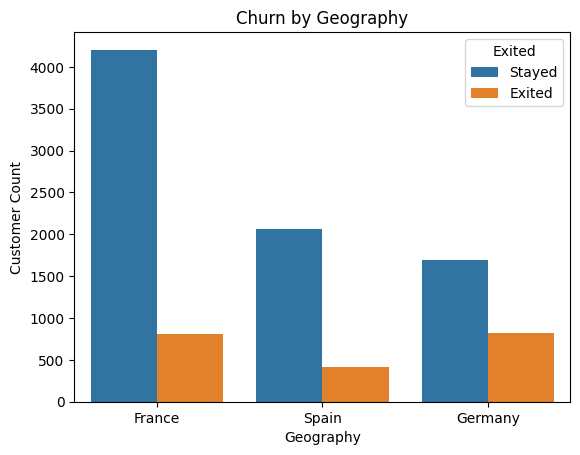

In [28]:
sns.countplot(data=my_data, x='Geography', hue='Exited')
plt.title("Churn by Geography")
plt.ylabel("Customer Count")
plt.legend(title='Exited', labels=['Stayed', 'Exited'])

plt.show()


**Analysis 4:Churn by Geography**
1. Germany shows a relatively higher churn rate compared to France and Spain.

2. Even though France has the most customers, Germany’s churn ratio is proportionally higher, indicating a geography-specific issue in customer satisfaction or service quality.

* Conclusion: Focus on improving customer engagement and service quality in Germany. Tailor localized strategies.

**Churn between Credit card users and Non Credit card users**

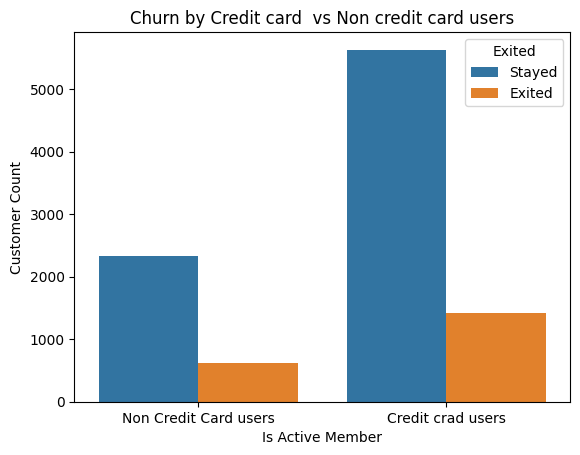

In [29]:
sns.countplot(data=my_data, x='HasCrCard', hue='Exited')
plt.title("Churn by Credit card  vs Non credit card users")
plt.xlabel("Is Active Member")
plt.ylabel("Customer Count")
plt.xticks([0,1], ['Non Credit Card users', 'Credit crad users'])
plt.legend(title='Exited', labels=['Stayed', 'Exited'])

plt.show()


**Analysis 5:Churn by Credit Card Ownership**
1. Slightly higher churn among customers with credit cards.

2. This could be due to hidden charges, unsatisfactory card benefits, or aggressive cross-selling.

* Conclusion: Re-evaluate credit card offers and understand if customers are dissatisfied with card services.**

**Churn rate as compared to Net Bank Balance**

/var/folders/cv/jn5269f15g7gvsxdrc067lbc0000gn/T/ipykernel_61931/1086044121.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_balance = my_data.groupby('BalanceRange')['Exited'].mean().reset_index()


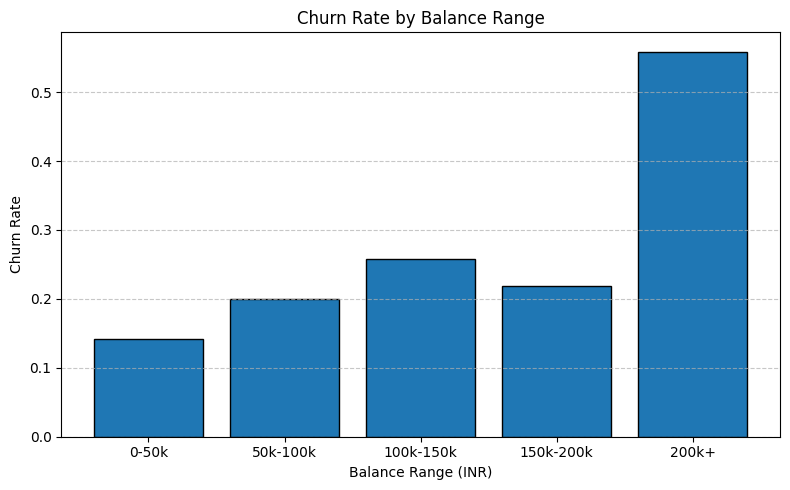

In [30]:
bins = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
my_data['BalanceRange'] = pd.cut(my_data['Balance'], bins=bins, labels=labels, include_lowest=True)

churn_by_balance = my_data.groupby('BalanceRange')['Exited'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(churn_by_balance['BalanceRange'], churn_by_balance['Exited'], edgecolor='black')
plt.title('Churn Rate by Balance Range')
plt.xlabel('Balance Range (INR)')
plt.ylabel('Churn Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis 6: Churn by Balance Range (from earlier)**
1. Customers with medium-to-high balances show higher churn.

2. Possibly indicates that high-value customers are leaving, which is a red flag.

* Conclusion: High net-worth clients must be prioritized with premium support, relationship managers, and loyalty perks.